#Two Column

In [31]:
# 0. 사용할 패키지 불러오기
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset_X = []
    dataset_Y = []
    
    for i in range(len(seq)-window_size):
        
        subset = seq[i:(i+window_size+1)]
        
        for si in range(len(subset)-1):
            features = code2features(subset[si])            
            dataset_X.append(features)

        y_features = code2features(subset[window_size], max_scale_value=1)            
        dataset_Y.append(y_features)
        
    return np.array(dataset_X), np.array(dataset_Y)

# 속성 변환 함수
def code2features(code, max_scale_value=6):
    features = []
    features.append(code2scale[code[0]]/float(max_scale_value))
    features.append(code2length[code[1]])
    return features

# 1. 데이터 준비하기

# 코드 사전 정의

code2scale = {'c':0, 'd':1, 'e':2, 'f':3, 'g':4, 'a':5, 'b':6}
code2length = {'4':0, '8':1}

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

max_scale_value = 6.0
    
# 시퀀스 데이터 정의
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

# 2. 데이터셋 생성하기

x_train, y_train = seq2dataset(seq, window_size = 4)
print('before reshape : ',x_train.shape)
# 입력을 (샘플 수, 타임스텝, 특성 수)로 형태 변환
X_train = np.reshape(x_train, (50, 4, 2))
print('after reshape : ',X_train.shape, y_train.shape)


before reshape :  (200, 2)
after reshape :  (50, 4, 2) (50, 2)


In [32]:
x_train[3], x_train[5], y_train[3], y_train[5]

(array([0.5, 1. ]),
 array([0.33333333, 0.        ]),
 array([1., 1.]),
 array([3., 1.]))

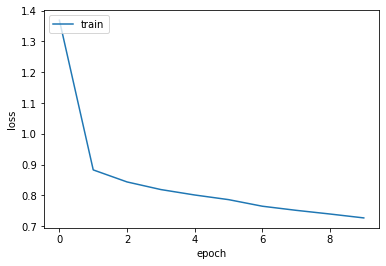

50/50 [==============================] - 0s 1ms/step - loss: 0.6326 - accuracy: 0.9400
loss: 0.63%, accuracy: 94.00%


In [40]:

# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 2), stateful=True))
model.add(Dense(2))
    
# 4. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기
num_epochs = 2000

hist = model.fit(X_train, y_train, epochs=500, batch_size=1, verbose=0, shuffle=False) # 50 is X.shape[0]
model.reset_states()
    
# 6. 학습과정 살펴보기
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(X_train, y_train, batch_size=1)
print("%s: %.2f%%, %s: %.2f%%" %(model.metrics_names[0], scores[0], model.metrics_names[1], scores[1]*100))



In [41]:
model.reset_states()
# 8. 모델 사용하기

# pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

sample = ['g8', 'e8', 'e4', 'f8']
pred_x = []
for si in range(len(sample)):
  features = code2features(sample[si], max_scale_value=1)            
  pred_x.append(features)

sample_in = np.array(pred_x)
# sample_in
sample_in = np.reshape(sample_in, (1, 4, 2))
pred_out = model.predict(sample_in, batch_size=1)
pred_out, y_train[0]

(array([[2.2394457 , 0.14335707]], dtype=float32), array([1., 1.]))